<a href="https://colab.research.google.com/github/crazycodersdev/DATA-MINING/blob/main/Case_Study_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Case Study: Analyzing Student Performance Data**

**Scenario:**
You are provided with a dataset containing student performance data from various schools. The data includes variables like age, gender, school type, study time, and grades in math, reading, and writing. The task is to perform Exploratory Data Analysis (EDA) on this dataset to identify trends, correlations, outliers, and patterns.


---
**Dataset: Student Performance Dataset**
Columns:

gender: Gender of the student (Male/Female)

age: Age of the student

studytime: Time spent on studying (in hours per week)

failures: Number of previous school failures

school: Type of school (e.g., "GP" for Gabriel Pereira, "MS" for Mousinho da
Silveira)

famrel: Family relationships rating (from 1 to 5)

freetime: Free time after school (1 to 5)

goout: Going out with friends (1 to 5)

absences: Number of school absences

math_score: Math score

reading_score: Reading score

writing_score: Writing score

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/student_performance.csv')

In [3]:
df

,gender,age,studytime,failures,school,famrel,freetime,goout,absences,math_score,reading_score,writing_score
0,Male,21,4,3,MS,5,2,2,1,3,100,48
1,Female,16,7,3,GP,2,3,3,9,3,5,68
2,Male,16,3,0,MS,2,4,2,17,55,51,61
3,Male,18,6,1,GP,1,5,2,12,24,25,59
4,Male,16,2,0,MS,4,5,5,4,66,63,49
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Female,21,10,0,MS,5,1,5,14,7,23,55
96,Female,21,3,3,GP,4,5,2,15,39,37,14
97,Female,19,7,2,GP,3,5,3,10,82,34,28
98,Female,21,10,3,MS,1,2,5,15,41,93,7


In [4]:
missing_values = df.isnull().sum()

In [5]:
missing_values

,0
gender,0
age,0
studytime,0
failures,0
school,0
famrel,0
freetime,0
goout,0
absences,0
math_score,0


**Descriptive statistics**

In [7]:
descriptive_stats = df.describe()

**Correlation matrix**

In [10]:
numeric_df = df.select_dtypes(include=['number'])

In [11]:
correlation_matrix = numeric_df.corr()

In [12]:
correlation_matrix

,age,studytime,failures,famrel,freetime,goout,absences,math_score,reading_score,writing_score
age,1.000000,0.159323,-0.017952,-0.096022,0.039069,-0.028177,0.143380,0.022882,0.056212,-0.071099
studytime,0.159323,1.000000,0.118473,-0.131725,-0.142528,-0.109545,-0.069525,0.007957,0.064692,-0.005191
failures,-0.017952,0.118473,1.000000,0.087884,0.030644,-0.016373,0.052462,-0.166807,0.014326,0.081586
famrel,-0.096022,-0.131725,0.087884,1.000000,0.019975,0.144381,-0.173462,-0.010689,-0.049828,0.082022
freetime,0.039069,-0.142528,0.030644,0.019975,1.000000,-0.059991,0.000842,0.086318,-0.113567,0.115018
goout,-0.028177,-0.109545,-0.016373,0.144381,-0.059991,1.000000,0.009558,0.211447,0.020515,0.176396
absences,0.143380,-0.069525,0.052462,-0.173462,0.000842,0.009558,1.000000,-0.102366,0.186935,-0.125911
math_score,0.022882,0.007957,-0.166807,-0.010689,0.086318,0.211447,-0.102366,1.000000,-0.024439,0.203456
reading_score,0.056212,0.064692,0.014326,-0.049828,-0.113567,0.020515,0.186935,-0.024439,1.000000,-0.151644
writing_score,-0.071099,-0.005191,0.081586,0.082022,0.115018,0.176396,-0.125911,0.203456,-0.151644,1.000000


**Visualize correlation matrix**

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

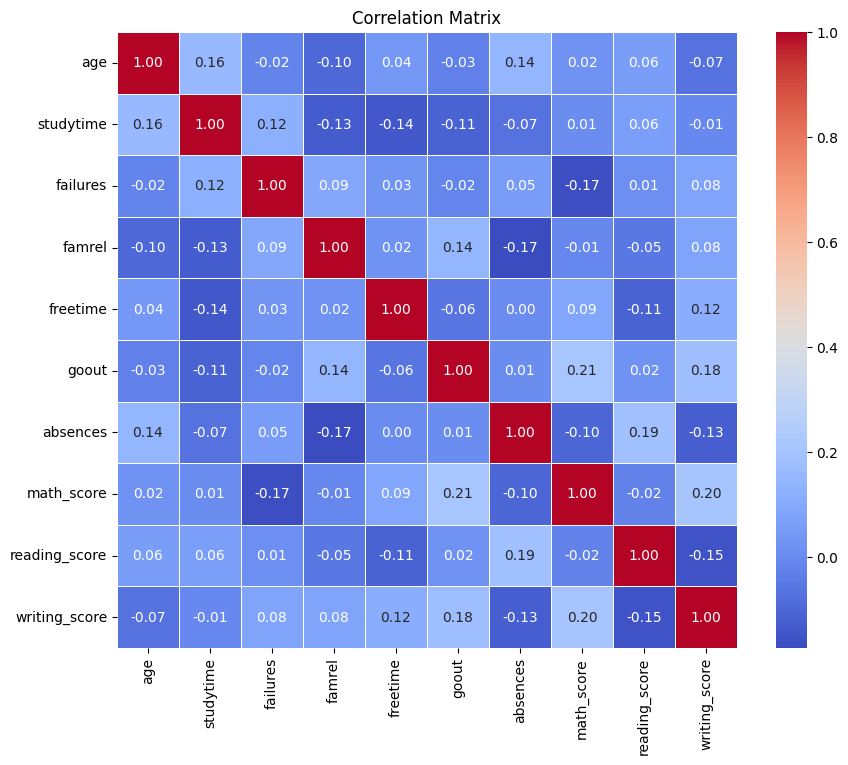

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Histograms

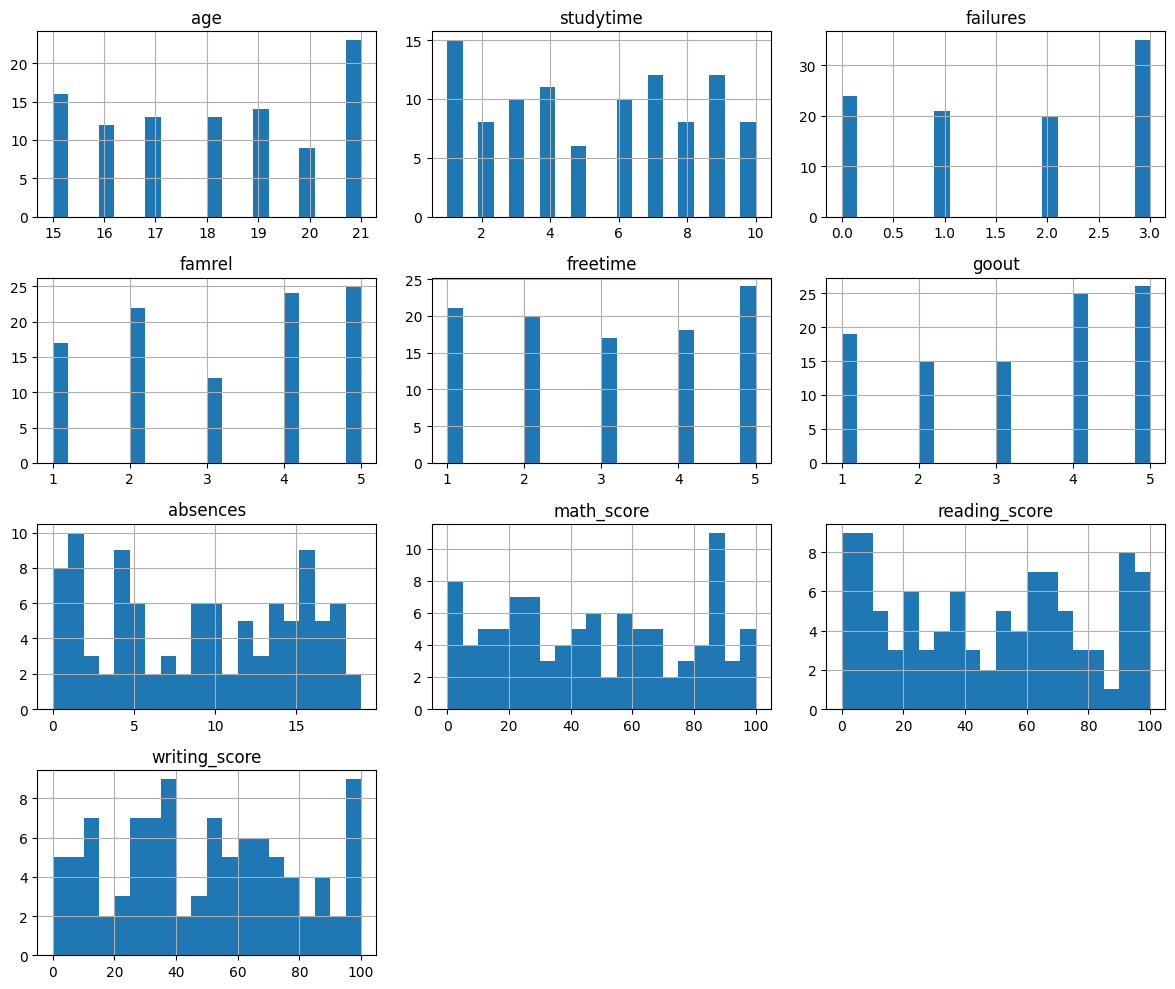

In [15]:
df.hist(bins=20, figsize=(12, 10))
plt.tight_layout()
plt.show()

# Boxplots for outliers

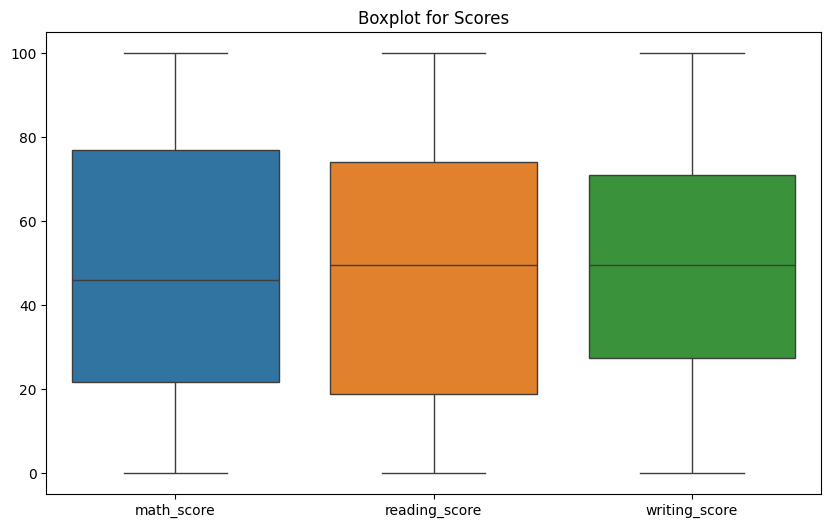

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['math_score', 'reading_score', 'writing_score']])
plt.title('Boxplot for Scores')
plt.show()

# Scatter plots

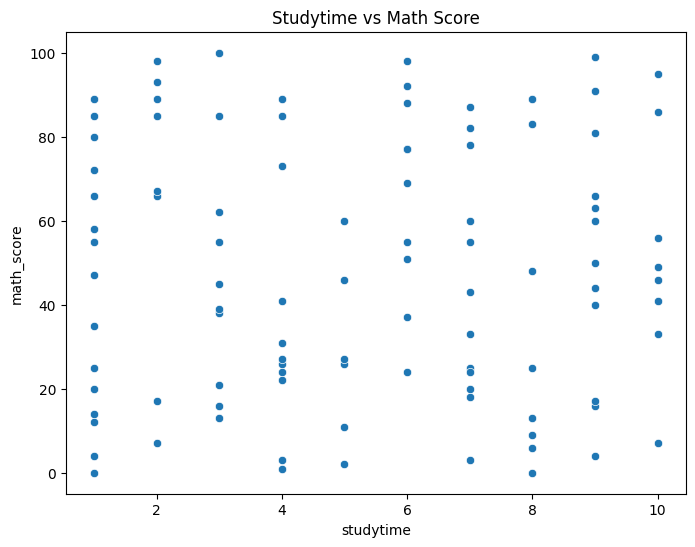

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='studytime', y='math_score', data=df)
plt.title('Studytime vs Math Score')
plt.show()

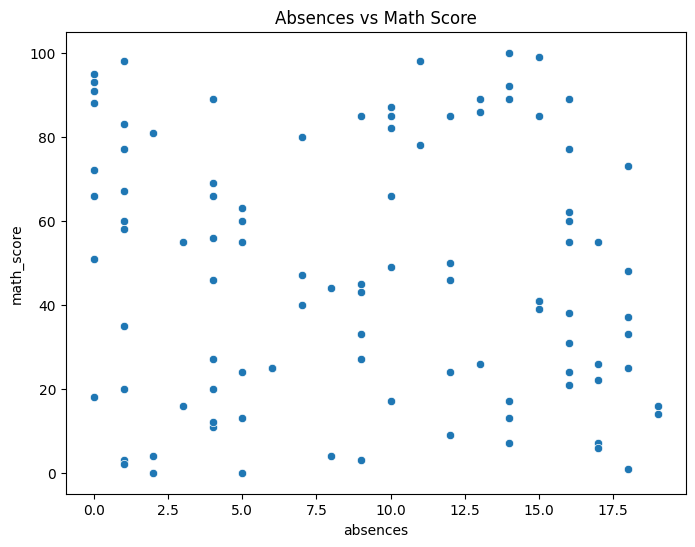

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='absences', y='math_score', data=df)
plt.title('Absences vs Math Score')
plt.show()

##**Pandas Profiling**

Source: https://github.com/pandas-profiling/pandas-profiling

See it in action below!

## **Pandas Profiling: Generating an EDA Report**

### **What is Pandas Profiling?**
Pandas Profiling is an automated tool that quickly generates an **Exploratory Data Analysis (EDA)** report. Instead of manually writing multiple lines of code for data exploration, this library provides a **detailed HTML report** with just a few lines of code.

---

### **Purpose of Pandas Profiling**
- Provides a **comprehensive summary** of a dataset.
- Helps in **identifying missing values, correlations, and outliers**.
- Generates visualizations like histograms, correlation matrices, and distributions automatically.
- Saves time by automating **data analysis and quality assessment**.

---

### **What Does the EDA Report Include?**
The generated **HTML report** contains:
1. **Overview:** Dataset shape, missing values, and data types.
2. **Variables Analysis:** Summary statistics for each column (mean, median, min, max, etc.).
3. **Interactions:** Correlations between numeric variables.
4. **Missing Values:** Graphical representation of missing data.
5. **Outliers Detection:** Highlights unusual data points.
6. **Sample Data:** Preview of the dataset.

---

### **Why Use Pandas Profiling?**
- **Saves time** compared to manually writing multiple EDA functions.
- **Easy visualization** of relationships, distributions, and missing data.
- **Helps in decision-making** before data preprocessing.

---

### **Next Steps**
- Install and use `pandas_profiling` in Google Colab.
- Generate an HTML EDA report for your dataset.


In [19]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     / 17.9 MB 31.5 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 69.0 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=390960 sha256=914bd065861c24cb8b40c5077dbc83508855727fb7ac51a4e998e58c299fd4ab
  Stored in directory: /tmp/pip-ephem-wheel-cache-8ohdkd2f/wheels/85/5d/45/8a23c7b77d2023fbc37490b8902f7fdeff5614f65d6e08b6c4
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=4163516b33c6712ba7ce39f4151e9ee27be806e4912294a51adce3cdcf69e4d8
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Succ

In [21]:
from pandas_profiling import ProfileReport

<ipython-input-21-e2a33329b6f0>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [22]:
profile_false = ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width':False}})

In [23]:
profile_true = ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width':True}})

In [24]:
profile_true

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
profile_true.to_file(output_file="REPORT.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# # Generate Pandas Profiling Report
# profile = pandas_profiling.ProfileReport(df)
# profile.to_file('student_performance_eda_report.html')
# profile

### 1. **Trends**
Trends are like the big-picture patterns that show us how things are changing over time or in relation to other factors. Imagine you’re looking at a report on how students are doing in their exams. A trend could be something like:

**“Students who study more tend to score better on exams.”**

#### Examples:
- **Positive Trend:** If students who spend more hours studying tend to score higher marks, that’s a **positive trend**.
- **Negative Trend:** If students who spend less time studying tend to score worse, that’s a **negative trend**.

In our case, we’re looking at the data to see if certain behaviors or actions (like study time) lead to better or worse outcomes (like exam scores).

---

### 2. **Patterns**
Patterns are more specific than trends. They help us notice regularities or behaviors in the data that happen repeatedly. Patterns can help us answer questions like:

**“Do certain types of students (like those from a particular school or gender) generally perform better?”**

#### Examples:
- If all the students from a certain school consistently score higher, that’s a **pattern**.
- If boys tend to study for longer hours than girls, that’s another **pattern**.

By identifying patterns, we can understand what might be influencing outcomes, such as higher exam scores, in a more detailed way.

---

### 3. **Outliers**
Outliers are the data points that don’t fit with the rest of the data. Imagine you have a group of students who usually score between 50 and 80 marks, but one student scores 1000 marks – that’s an outlier because it’s so different from everyone else.

#### In simpler terms:
**Outliers** are values that are too high or too low compared to the rest of the data. They might indicate something unusual or exceptional, like a student who did something extraordinary to score very high.

#### Example:
In a study about student performance, an outlier might be a student who has missed **50 days of school**. This is so different from the usual range of absences that it might need further attention.

---

### **Putting It All Together:**
In data analysis, we’re trying to answer questions like:
- **Trends:** Do students who study more perform better?
- **Patterns:** Do certain groups of students (based on school or gender) perform differently?
- **Outliers:** Are there any students who are far ahead or behind the rest?

By identifying trends, patterns, and outliers, we get a clearer picture of what's going on in the data and what actions or interventions might help improve outcomes.


**1. High correlation between studytime and math_score**

In [28]:
studytime_math_corr = df[['studytime', 'math_score']].corr()
print("Correlation between Studytime and Math Score:", studytime_math_corr.iloc[0, 1])

Correlation between Studytime and Math Score: 0.007957097367326239


 **Scatter plot between studytime and math_score**

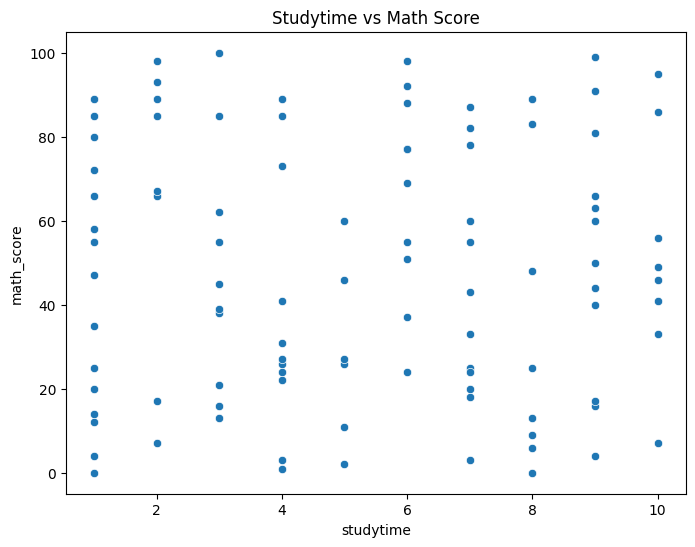

In [29]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='studytime', y='math_score', data=df)
plt.title('Studytime vs Math Score')
plt.show()